<a href="https://colab.research.google.com/github/loc1263/COVID-Chile/blob/master/COVID_IT_CL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd

data = pd.read_csv('/content/drive/My Drive/Dataset/ITvsCL.Covid19/Covid_ITvsCL.csv', sep=';')
data.head()

,Day,Date-IT,Confirmed-IT,Percent-IT,Deaths-IT,Rec-IT,Tested-IT,DeathsRate-IT,Date-CL,Confirmed-CL,Percent-CL,Deaths-CL,Rec-CL,Tested-CL,DeathsRate-CL
0,1,31-01-2020,2.0,NaN,0.0,0.0,0.0,"0,00",03-03-2020,1.0,NaN,0.0,NaN,NaN,NaN
1,2,01-02-2020,2.0,0.0,0.0,0.0,0.0,"0,00",04-03-2020,3.0,200.0,0.0,NaN,NaN,NaN
2,3,02-02-2020,2.0,0.0,0.0,0.0,0.0,"0,00",05-03-2020,4.0,33.0,0.0,NaN,NaN,NaN
3,4,03-02-2020,2.0,0.0,0.0,0.0,0.0,"0,00",06-03-2020,5.0,25.0,0.0,NaN,NaN,NaN
4,5,04-02-2020,2.0,0.0,0.0,0.0,0.0,"0,00",07-03-2020,7.0,40.0,0.0,NaN,NaN,NaN


In [4]:

data = pd.read_csv('/content/drive/My Drive/Dataset/ITvsCL.Covid19/Covid_ITvsCL.csv', sep=';',usecols=["Day","Date-IT","Confirmed-IT","Deaths-IT","Date-CL","Confirmed-CL","Deaths-CL"])
data['Confirmed-IT'] = data['Confirmed-IT'].astype('Int64')
data['Confirmed-CL'] = data['Confirmed-CL'].astype('Int64')

data.head()


,Day,Date-IT,Confirmed-IT,Deaths-IT,Date-CL,Confirmed-CL,Deaths-CL
0,1,31-01-2020,2,0.0,03-03-2020,1,0.0
1,2,01-02-2020,2,0.0,04-03-2020,3,0.0
2,3,02-02-2020,2,0.0,05-03-2020,4,0.0
3,4,03-02-2020,2,0.0,06-03-2020,5,0.0
4,5,04-02-2020,2,0.0,07-03-2020,7,0.0


## **Data Chile**

---




In [9]:
dataCL = pd.read_csv('/content/drive/My Drive/Dataset/ITvsCL.Covid19/Covid_ITvsCL.csv' ,sep=';',usecols=["Day","Date-CL","Confirmed-CL","Deaths-CL"])
dataCL['Confirmed-CL'] = dataCL['Confirmed-CL'].astype('Int64')
dataCL = dataCL.loc[ 0:15,:]

dataCL


,Day,Date-CL,Confirmed-CL,Deaths-CL
0,1,03-03-2020,1,0.0
1,2,04-03-2020,3,0.0
2,3,05-03-2020,4,0.0
3,4,06-03-2020,5,0.0
4,5,07-03-2020,7,0.0
5,6,08-03-2020,10,0.0
6,7,09-03-2020,13,0.0
7,8,10-03-2020,17,0.0
8,9,11-03-2020,23,0.0
9,10,12-03-2020,33,0.0


In [8]:
# Calculo desde el caso 75 con un 30 % de incremento diario

Pivote=201
dia=18
CasosCL=0

#Dia -  Casos
for x in range(15):
    CasosCL= Pivote + 0.3*Pivote
    Pivote = CasosCL
    print(dia,"-",round(CasosCL))
    dia=dia+1

18 - 261
19 - 340
20 - 442
21 - 574
22 - 746
23 - 970
24 - 1261
25 - 1640
26 - 2132
27 - 2771
28 - 3602
29 - 4683
30 - 6088
31 - 7914
32 - 10288


## **Data Italia**


In [12]:
dataIT = pd.read_csv('/content/drive/My Drive/Dataset/ITvsCL.Covid19/Covid_ITvsCL.csv' ,sep=';',usecols=["Day","Date-IT","Confirmed-IT","Deaths-IT"])
dataIT['Confirmed-IT'] = dataIT['Confirmed-IT'].astype('Int64')
dataIT = dataIT.loc[ 21:40,:]

dataIT=dataIT.reset_index(drop=True)
dataIT


,Day,Date-IT,Confirmed-IT,Deaths-IT
0,22,21-02-2020,20,1.0
1,23,22-02-2020,79,2.0
2,24,23-02-2020,150,3.0
3,25,24-02-2020,227,7.0
4,26,25-02-2020,320,10.0
5,27,26-02-2020,445,12.0
6,28,27-02-2020,650,17.0
7,29,28-02-2020,888,21.0
8,30,29-02-2020,1128,29.0
9,31,01-03-2020,1694,34.0


## **Graficos**

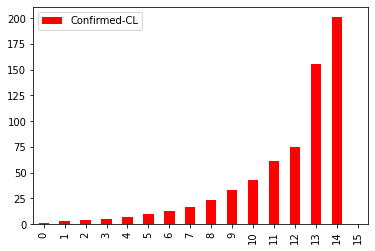

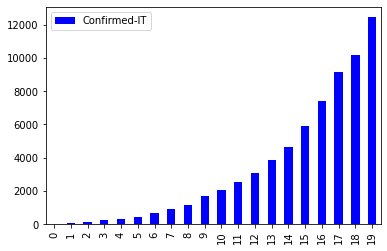

In [13]:
import matplotlib.pyplot as plt
import numpy as np

dataCL.plot(kind='bar',y='Confirmed-CL',color='red')
dataIT.plot(kind='bar',y='Confirmed-IT',color='blue')
plt.show()

## **Merge**
Data asumiendo que Italia empezo a contabilizar bien desde el dia 21

In [14]:
## Juntar dataCL con dataIT

DataMerge=dataCL.merge(dataIT, left_index=True, right_index=True)
DataMerge.head(30)

,Day_x,Date-CL,Confirmed-CL,Deaths-CL,Day_y,Date-IT,Confirmed-IT,Deaths-IT
0,1,03-03-2020,1,0.0,22,21-02-2020,20,1.0
1,2,04-03-2020,3,0.0,23,22-02-2020,79,2.0
2,3,05-03-2020,4,0.0,24,23-02-2020,150,3.0
3,4,06-03-2020,5,0.0,25,24-02-2020,227,7.0
4,5,07-03-2020,7,0.0,26,25-02-2020,320,10.0
5,6,08-03-2020,10,0.0,27,26-02-2020,445,12.0
6,7,09-03-2020,13,0.0,28,27-02-2020,650,17.0
7,8,10-03-2020,17,0.0,29,28-02-2020,888,21.0
8,9,11-03-2020,23,0.0,30,29-02-2020,1128,29.0
9,10,12-03-2020,33,0.0,31,01-03-2020,1694,34.0


In [15]:
## Agregar porcentaje de incremento diario
DataMerge['Porcentaje-IT']=(DataMerge['Confirmed-IT'] *100)/DataMerge['Confirmed-IT'].shift()
DataMerge['Porcentaje-CL']=(DataMerge['Confirmed-CL'] *100)/DataMerge['Confirmed-CL'].shift()

DataMerge=DataMerge[['Date-CL', 'Confirmed-CL', 'Porcentaje-CL', 'Deaths-CL','Date-IT', 'Confirmed-IT', 'Porcentaje-IT', 'Deaths-IT']]
DataMerge=DataMerge.round({"Porcentaje-IT":2, "Porcentaje-CL":2})
DataMerge

,Date-CL,Confirmed-CL,Porcentaje-CL,Deaths-CL,Date-IT,Confirmed-IT,Porcentaje-IT,Deaths-IT
0,03-03-2020,1,NaN,0.0,21-02-2020,20,NaN,1.0
1,04-03-2020,3,300.00,0.0,22-02-2020,79,395.00,2.0
2,05-03-2020,4,133.33,0.0,23-02-2020,150,189.87,3.0
3,06-03-2020,5,125.00,0.0,24-02-2020,227,151.33,7.0
4,07-03-2020,7,140.00,0.0,25-02-2020,320,140.97,10.0
5,08-03-2020,10,142.86,0.0,26-02-2020,445,139.06,12.0
6,09-03-2020,13,130.00,0.0,27-02-2020,650,146.07,17.0
7,10-03-2020,17,130.77,0.0,28-02-2020,888,136.62,21.0
8,11-03-2020,23,135.29,0.0,29-02-2020,1128,127.03,29.0
9,12-03-2020,33,143.48,0.0,01-03-2020,1694,150.18,34.0
